In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import string
import nlp_utils as nu

In [2]:
d= open('dialogs.txt','r')            # open a text file for reading 
print(d.read())                       # read text from the text file

hi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.
i've been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it's okay. it's a really big campus.
it's okay. it's a really big campus.	good luck with school.
good luck with school.	thank you very much.
how's it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i've actually been pretty good. you?
i've actually been pretty good. you?	i'm actually in school right now.
i'm actually in school right now.	which school do you attend?
which school do 

In [3]:
df= pd.read_csv('dialogs.txt', names=('Query','Responses'), sep=('\t'))
df.head()

,Query,Responses
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.


In [4]:
df.shape

(3725, 2)

In [5]:
df.columns

Index(['Query', 'Responses'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Query      3725 non-null   object
 1   Responses  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


In [7]:
df.describe()

,Query,Responses
count,3725,3725
unique,3510,3512
top,what do you mean?,what do you mean?
freq,22,22


In [8]:
df.nunique()

Query        3510
Responses    3512
dtype: int64

In [9]:
df.isnull().sum()

Query        0
Responses    0
dtype: int64

In [10]:
df.Query.value_counts()     # Checking the counts of the values present in the column 'Query'

what do you mean?                              22
why not?                                       16
what happened?                                 10
why is that?                                    9
me too.                                         7
                                               ..
you can yell at them.                           1
and they will yell back at you.                 1
yelling doesn't do any good.                    1
will you look at this form?                     1
but i do all my writing with my right hand.     1
Name: Query, Length: 3510, dtype: int64

In [11]:
df.Responses.value_counts()

what do you mean?                                                       22
why not?                                                                16
what happened?                                                          10
why is that?                                                             9
of course.                                                               8
                                                                        ..
i don't understand some things.                                          1
let me help you.                                                         1
what does "mi" mean?                                                     1
mi stands for middle initial.                                            1
start typing instead. that way your left hand will do half the work.     1
Name: Responses, Length: 3512, dtype: int64

# Data Visualization

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [13]:
nltk.download('vader_lexicon') 

# VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that
#  is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ajay2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
text= df.Query

In [15]:
sia = SentimentIntensityAnalyzer()

for i in text:
    print(i)
    
    s= sia.polarity_scores(i)
    
    for k in s:
        print('{0}:{1},'.format(k,s[k]), end='')
    print()

hi, how are you doing?
neg:0.0,neu:1.0,pos:0.0,compound:0.0,
i'm fine. how about yourself?
neg:0.0,neu:0.69,pos:0.31,compound:0.2023,
i'm pretty good. thanks for asking.
neg:0.0,neu:0.25,pos:0.75,compound:0.8402,
no problem. so how have you been?
neg:0.495,neu:0.505,pos:0.0,compound:-0.5994,
i've been great. what about you?
neg:0.0,neu:0.549,pos:0.451,compound:0.6249,
i've been good. i'm in school right now.
neg:0.0,neu:0.707,pos:0.293,compound:0.4404,
what school do you go to?
neg:0.0,neu:1.0,pos:0.0,compound:0.0,
i go to pcc.
neg:0.0,neu:1.0,pos:0.0,compound:0.0,
do you like it there?
neg:0.0,neu:0.615,pos:0.385,compound:0.3612,
it's okay. it's a really big campus.
neg:0.0,neu:0.725,pos:0.275,compound:0.2263,
good luck with school.
neg:0.0,neu:0.253,pos:0.747,compound:0.7096,
how's it going?
neg:0.0,neu:1.0,pos:0.0,compound:0.0,
i'm doing well. how about you?
neg:0.0,neu:0.704,pos:0.296,compound:0.2732,
never better, thanks.
neg:0.828,neu:0.172,pos:0.0,compound:-0.5875,
so how have y

In [16]:
# Creating a DataFrame

df['Rating'] = text.apply(sia.polarity_scores)
df=pd.concat([df.drop(['Rating'], axis=1), df['Rating'].apply(pd.Series)], axis=1)

In [17]:
df

,Query,Responses,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?,0.000,0.707,0.293,0.4404
3721,are you right-handed?,yes. all my life.,0.000,1.000,0.000,0.0000
3722,yes. all my life.,you're wearing out your right hand. stop using...,0.000,0.526,0.474,0.4019
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.,0.153,0.625,0.222,0.2500


In [18]:
# Importing 'WordCloud' for visualing

from wordcloud import WordCloud

In [19]:
def wordcloud(df,label):
    subset = df[df[label]==1]
    text= df.Query.values
    wc= WordCloud()
    wc.generate(' '.join(text))
    
    plt.figure(figsize=(30,20))
    plt.subplot(221)
    plt.axis('off')
    plt.title('Words frequency in {}'.format(label))
    plt.imshow(wc.recolor(colormap='gist_earth', random_state=244), alpha=0.98)

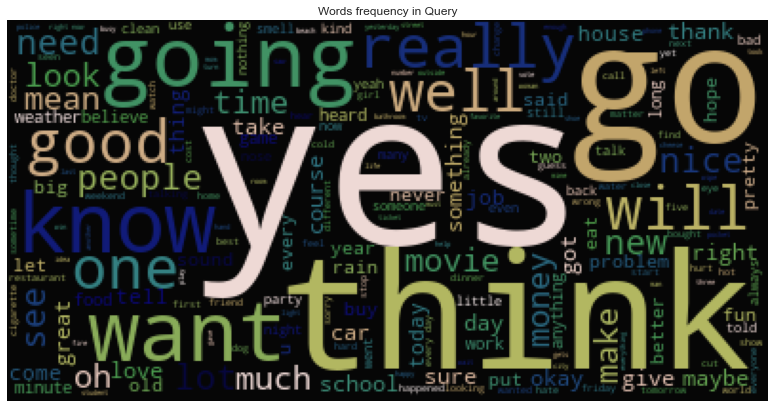

In [20]:
wordcloud(df,'Query')       # # top words in the query column

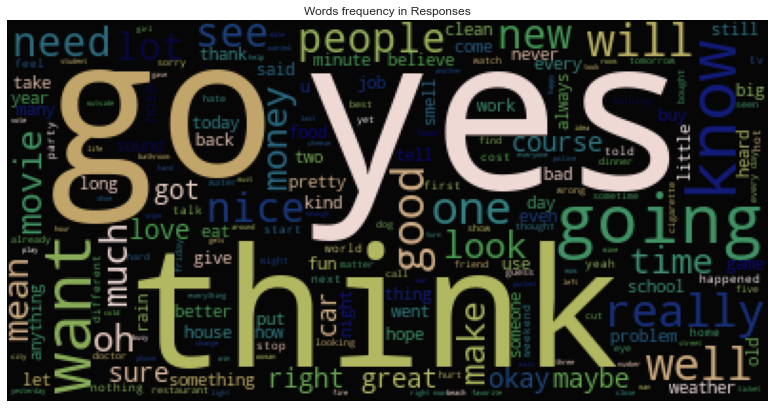

In [21]:
wordcloud(df,'Responses')          ## top words in the responses column

# Text Normalization                           (i.e removing of special characters)

In [22]:
import re                                # Importing regular expression

In [23]:
# lower casing the text

punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

In [24]:
# removing \n and replacing them with empty value

remove_n = lambda x: re.sub("\n", " ", x)

In [25]:
# removing non ascii characters

remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

In [26]:
# removing alpha numeric values

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

In [27]:
# using map function and applying the function on response column

df['Query']= df['Query'].map(alphanumeric).map(remove_non_ascii).map(remove_n).map(punc_lower)

In [28]:
df

,Query,Responses,neg,neu,pos,compound
0,hi how are you doing,i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that s a good question maybe it s not old age,are you right-handed?,0.000,0.707,0.293,0.4404
3721,are you right handed,yes. all my life.,0.000,1.000,0.000,0.0000
3722,yes all my life,you're wearing out your right hand. stop using...,0.000,0.526,0.474,0.4019
3723,you re wearing out your right hand stop using...,but i do all my writing with my right hand.,0.153,0.625,0.222,0.2500


# Important Sentences

In [29]:
# arranging the compound column in descending order to find the best sentence. 

imp_sent= df.sort_values(by= 'compound', ascending=False)
imp_sent.head()

,Query,Responses,neg,neu,pos,compound
1019,if we are good we will be happy in heaven wit...,that's what many people believe.,0.0,0.400,0.600,0.9001
565,yeah it sounds like it s going to be the best...,"exactly, it seems like it's going to be loads ...",0.0,0.463,0.537,0.8910
1235,that is a lot of friends do you have a best f...,of course. i have lots of best friends.,0.0,0.400,0.600,0.8885
3414,well that s okay as long as it helps him rel...,"yes, we need a relaxed president who thinks cl...",0.0,0.419,0.581,0.8883
3470,so it s better to save money than to have an h...,"well, the democratic party says it was an hone...",0.0,0.482,0.518,0.8651


# Top positive Sentences , negative sentences & neutral sentences

In [30]:
pos_sent= df.sort_values(by='pos', ascending=False)
pos_sent.head()

,Query,Responses,neg,neu,pos,compound
1659,please,you know the rules.,0.0,0.0,1.0,0.3182
1191,yes,no. that's incomplete.,0.0,0.0,1.0,0.4019
223,well congratulations,thank you.,0.0,0.0,1.0,0.7184
2745,i agree,you never know what might happen on these free...,0.0,0.0,1.0,0.3612
3583,sure,thank you.,0.0,0.0,1.0,0.3182


In [31]:
neg_sent= df.sort_values(by='neg', ascending=False)
neg_sent.head()

,Query,Responses,neg,neu,pos,compound
1294,no,how do you know?,1.000,0.000,0.0,-0.2960
2378,no,he had dirty fingernails.,1.000,0.000,0.0,-0.2960
154,no problem,did you need something?,1.000,0.000,0.0,-0.5994
3095,no i hate vegetables,but you eat fruits.,0.855,0.145,0.0,-0.7096
13,never better thanks,so how have you been lately?,0.828,0.172,0.0,-0.5875


In [32]:
neu_sent= df.sort_values(by='neu', ascending=False)
neu_sent.head()

,Query,Responses,neg,neu,pos,compound
0,hi how are you doing,i'm fine. how about yourself?,0.0,1.0,0.0,0.0
3050,we get hamburgers and steak,"oh, that's so delicious.",0.0,1.0,0.0,0.0
1596,what is gravity,it's the force that pulls everything down.,0.0,1.0,0.0,0.0
1597,it s the force that pulls everything down,i don't understand.,0.0,1.0,0.0,0.0
1598,i don t understand,"if you pour water into a glass, the water goes...",0.0,1.0,0.0,0.0


In [33]:
# importing tfidf vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
# Word Embedding - TF-IDF

tfidf= TfidfVectorizer()

In [35]:
# changing column into array

factors =tfidf.fit_transform(df.Query).toarray()

In [36]:
tfidf.get_feature_names()

C:\Users\ajay2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['able',
 'about',
 'absolutely',
 'accident',
 'accidents',
 'aches',
 'across',
 'act',
 'action',
 'activities',
 'actor',
 'actors',
 'actress',
 'actually',
 'add',
 'added',
 'adding',
 'address',
 'ads',
 'adventure',
 'afford',
 'afraid',
 'after',
 'afternoon',
 'afterwards',
 'again',
 'against',
 'age',
 'ago',
 'agree',
 'ahead',
 'aid',
 'aids',
 'air',
 'airport',
 'aisle',
 'alarm',
 'alice',
 'alive',
 'all',
 'allergic',
 'alley',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'altitude',
 'always',
 'am',
 'amateur',
 'amazing',
 'american',
 'an',
 'and',
 'andy',
 'angeles',
 'angry',
 'animal',
 'animals',
 'anita',
 'anniversary',
 'another',
 'answer',
 'answered',
 'antenna',
 'any',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apartment',
 'apologize',
 'apologized',
 'apples',
 'appointment',
 'appreciate',
 'april',
 'are',
 'aren',
 'argument',
 'arizona',
 'arm',
 'arms',
 'army',
 'around',
 'arrow',
 'art',
 'a

# Application

In [37]:
from sklearn.metrics.pairwise import cosine_distances

In [38]:
query = 'Who are you ?'

def chatbot(query):
    
    query = nu.lemmatization_sentence(query)                       # step-1: Clean
    
    query_vector= tfidf.transform([query]).toarray()               # step-2: word embedding-transform
    
    similar_score= 1 - cosine_distances(factors, query_vector)     # step-3: cosine similarity
    
    index= similar_score.argmax()                                  # take amx index position
    
    matching_question= df.loc[index]['Query']                      # searching or matching question
    
    response= df.loc[index]['Responses']
    
    pos_score= df.loc[index]['pos']
    neg_score= df.loc[index]['neg']
    neu_score= df.loc[index]['neu']
    
    confidence= similar_score[index][0]
    
    chat_dict = {'match': matching_question,
                'response': response,
                'score': confidence,
                'pos': pos_score,
                'neg': neg_score,
                'neu': neu_score}
    return chat_dict

In [ ]:
while True:
    query = input('\n User : ')
    if query == 'exit':
        break
        
    response = chatbot(query)
    if response['score'] <= 0.2 :
        print('BOT : Please rephrase your question')
        
    else:
        print('='*80)
        print('logs:\n Matched Question: %r\n Confidence score: %0.2f \n PositiveScore: %r \n NegativeScore: %r\n NeutralScore: %r'%(
            response['match'],response['score']*100,response['pos'],response['neg'],response['neu']))
        print('='*80)
        print('BOT: ',response['response'])


 User : Hi how are you
logs:
 Matched Question: 'hi  how are you doing '
 Confidence score: 72.78 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT:  i'm fine. how about yourself?

 User : I am doing good
logs:
 Matched Question: 'what good does it do '
 Confidence score: 51.22 
 PositiveScore: 0.42 
 NegativeScore: 0.0
 NeutralScore: 0.58
BOT:  you get to put someone in power that you like.

 User : what are you doing tommorow
logs:
 Matched Question: 'what do you do '
 Confidence score: 74.30 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT:  i'm a babysitter.
